- OpenCV是由一系列的源代码组成，每几个源代码组成一个模块，若干个模块构成了整个OpenCV
- TensorFlow是谷歌开源的框架，主要依靠张量和数据图进行计算

# OpenCV

## 1. 图片读取与展示

In [3]:
import cv2

# 1.文件读取；2.封装格式(jpg,png)解析；3.数据解码；
img = cv2.imread("pic.jpg",1)    # 参数1：读取图片所在地址，参数2：图片读取的类型：0为灰度图，1为彩色图
# 此时img为图片的原始数据

# 文件头：数据部分的解码信息，以及附加信息
# 文件数据：并不是图片的原始数据，而是图片进行【压缩编码】后的数据
# 解码器：根据图像的文件头信息，还原出文件的原始数据
# 压缩编码：方便存储和传输
# 文件需要压缩编码，就需要文件头，对压缩编码的数据进行描述，以方便解码器，根据当前的描述参数完成对于文件压缩数据的解析

# 4.数据加载
cv2.imshow("image", img)    # 参数1：窗口名称，参数2：要显示的图片
cv2.waitKey(40)    # 完成程序的暂停
cv2.destroyAllWindows()

## 2. 图片写入和图像质量

- 不同压缩比的图片保存
- 压缩比：以牺牲图片质量为代价（有损压缩）

In [8]:
cv2.imwrite("pic1.jpg",img, [cv2.IMWRITE_JPEG_QUALITY,0])    
# 参数1：图片保存的名称，需要加上格式名，
# 参数2：图片保存的数据（解码之后的数据，即图片的原始数据，data类型）
# 参数3：对于jpg文件的压缩，可以控制当前图像的质量，范围是[0,100]。数值越小，压缩比越高，图像质量越差

# png无损压缩，png还可以设置透明度
cv2.imwrite("pic2.png",img, [cv2.IMWRITE_PNG_COMPRESSION,9]) 
# 参数3：压缩比，范围[0,9]。数值越小，压缩比越低，图像质量越好

True

## 3. 像素操作

- 像素
- 每个像素都由RGB组成
- 颜色深度：
    - 8bit:每一个通道的颜色深度，范围[0:255]
    - rgb中，每一个颜色分量(颜色通道)，都有2^8种颜色。总共有256^3种颜色
- 图片的高宽
- 图片容量大小：
    - 1.14M = 720*547*3*8bit / 8 (转成字节：B)
- png图片还有alpha透明度分量
- BGR
- xy坐标：
    - x：图片的宽和图片的列
    - y：图片的高和图片的行

In [11]:
# 像素值的读取
# 读取一个具体的像素点（100，100）的像素值bgr（93 36 4）
(b,g,r) = img[100,100]
print(b,g,r)
print(img[100,100])
print(type(img[100,100]))

93 36 4
[93 36  4]
<class 'numpy.ndarray'>


In [ ]:
# 像素值的写入
# 绘制蓝色直线：从第10行，第100列开始，到第110行，第100列结束
for i in range(101):
    img[10+i, 100] = [255,0,0]
cv2.imshow("image_blue_line", img)
cv2.waitKey(1000)
cv2.destroyAllWindows()

# TensorFlow

In [1]:
import tensorflow as tf
hello = tf.constant("hello world")

with tf.Session() as sess:
    print(sess.run(hello))

b'hello world'


In [2]:
hello = tf.constant("hello tensorflow")
sess = tf.Session()
print(sess.run(hello))
sess.close()

b'hello tensorflow'


## 1. 变量和常量的定义，基础数据类型的定义，变量的使用方法

- 学习语言：
    - 类比：语法，api，原理
    - 基础数据类型，运算符，流程，字典，数组

- tf本质：
    - tf = tensor（数据） + graph（计算图）
        - op 任何调用api操作：赋值，运算等
        - graph 数据和操作的过程
        - 必须在会话中运行，session相当于交互环境

In [3]:
data1 = tf.constant(2,dtype=tf.int32)
data2 = tf.Variable(10,name="var")
print(data1)
print(data2)

Tensor("Const_2:0", shape=(), dtype=int32)
<tf.Variable 'var:0' shape=() dtype=int32_ref>


In [4]:
sess = tf.Session()
# 在tf中，所有的变量都必须要使用session会话进行初始化
init = tf.global_variables_initializer()    # 初始化变量

"""
print(sess.run(data1))
sess.run(init)    # 所有变量都要先完成初始化之后，才能进行后续操作
print(sess.run(data2))
sess.close()      # 关闭会话
"""

with sess:
    print(sess.run(data1))
    sess.run(init)
    print(sess.run(data2))

2
10


## 2. 常用数据类型的四则运算

- sess.run(tensor)

- tensor.eval()

In [5]:
# 常量与常量之间的四则运算
data1 = tf.constant(6)
data2 = tf.constant(2)

dataAdd = tf.add(data1, data2)
dataSub = tf.subtract(data1, data2)
dataMul = tf.multiply(data1, data2)
dataDiv = tf.divide(data1, data2)

with tf.Session() as sess:
    print(sess.run(dataAdd))
    print(sess.run(dataSub))
    print(sess.run(dataMul))
    print(sess.run(dataDiv))
print("End!")

8
4
12
3.0
End!


In [6]:
# 常量与变量之间的四则运算
data1 = tf.constant(6)
data2 = tf.Variable(2)

dataAdd = tf.add(data1, data2)
dataSub = tf.subtract(data1, data2)
dataMul = tf.multiply(data1, data2)
dataDiv = tf.divide(data1, data2)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(dataAdd))
    print(sess.run(dataSub))
    print(sess.run(dataMul))
    print(sess.run(dataDiv))
print("End!")

8
4
12
3.0
End!


In [7]:
data1 = tf.constant(6)
data2 = tf.Variable(2)

dataAdd = tf.add(data1, data2)

dataCopy = tf.assign(data2, dataAdd)    # 把dataAdd的值，赋给data2，并返回data2的值

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(dataAdd))
    print("sess.run(dataCopy)", sess.run(dataCopy))    # 把8赋值给data2，然后又调用dataAdd方法，下同
    print("dataCopy.eval()", dataCopy.eval())    # .eval()相当于使用默认的会话运行op
    print("tf.get_default_session().run(dataCopy)", tf.get_default_session().run(dataCopy))
print("End!")

8
sess.run(dataCopy) 8
dataCopy.eval() 14
tf.get_default_session().run(dataCopy) 20
End!


## 3. placeholder占位符

In [8]:
data1 = tf.placeholder(tf.float32)
data2 = tf.placeholder(tf.float32)

dataAdd = tf.add(data1,data2)

with tf.Session() as sess:
    # 参数1：运算之后的张量dataAdd
    # 参数2：需要追加的数据，大括号里面的内容源自于dataAdd里面的计算内容，因为有data1和2，所以就有参数1和参数2
    print(sess.run(dataAdd,feed_dict={data1:6,data2:2}))
    
print("End!")

8.0
End!


## 4. 矩阵运算

- m行n列的数组：[]
    - []的内部是由若干个[]组成
    - 每个内部[]，表示列数据
    - 每个中括号作为一个整体，表示行数据
    
- 例子：定义一个1行2列的矩阵
    - 1. 因为是矩阵，所以最外层有一个中括号，[]
    - 2. 1行2列，说明行是1，m=1，n=2
    - 3. 中括号的整体表示行数，既然m=1，说明外层[]里面只有一个[]，即[[]]
    - 4. 中括号里面的内容是数据，既然是n=2，说明内部[]有两个数据，即[[6,6]]

In [9]:
data1 = tf.constant([[6,6]])
data2 = tf.constant([[2],
                     [2]])
data3 = tf.constant([[3,3]])
data4 =  tf.constant([[1,2],
                      [3,4],
                      [5,6]])
print(data4.shape)    # 维度

# 打印每个矩阵中的内容
with tf.Session() as sess:
    print(sess.run(data4))    # 打印整体
    
    # 打印第一行（打印某一行）
    print(sess.run(data4[0]))    
    # 打印第一列（打印某一列）
    print(sess.run(data4[: ,0]))
    # 打印第一行第一列
    print(sess.run(data4[0,0]))


(3, 2)
[[1 2]
 [3 4]
 [5 6]]
[1 2]
[1 3 5]
1


In [10]:
# 矩阵加法：保证两个矩阵的M*N完全相同
# 矩阵乘法：保证第一个矩阵的列数，与第二个矩阵的行数相等
data1 = tf.constant([[6,6]])
data2 = tf.constant([[2],
                     [2]])
data3 = tf.constant([[3,3]])
data4 = tf.constant([[1,2],
                      [3,4],
                      [5,6]])

matMul = tf.matmul(data1,data2)
matMul2 = tf.multiply(data1,data2)
matAdd = tf.add(data1,data3)

with tf.Session() as sess:
    print(sess.run(matMul))    # 1维
    print(sess.run(matAdd))    # 1行2列
    print(sess.run(matMul2))   # 1x2  2x1  ==  2x2
    print(sess.run([matMul, matAdd]))

[[24]]
[[9 9]]
[[12 12]
 [12 12]]
[array([[24]], dtype=int32), array([[9, 9]], dtype=int32)]


## 5. 特殊矩阵

- 全0矩阵
- 全1矩阵
- 填充矩阵
- zeros_like
- 均分矩阵
- 随机矩阵

In [11]:
mat0 = tf.constant([[0,0,0],[0,0,0]])

mat1 = tf.zeros([2,3])    # 2行3列的全0矩阵

mat2 = tf.ones([3,2])     # 3行2列的全1矩阵

mat3 = tf.fill([2,3],15)  # 2行3列的填充矩阵（全15矩阵）

mat4 = tf.constant([[2],[3],[4]])

mat5 = tf.zeros_like(mat4)    # mat5与mat4具有相同的维度的全0矩阵


# 把0-2之间的数据分成相等的10份（有11个数据）
mat6 = tf.linspace(0.0,2.0,11)
# 参数1：起始数值，float32或float64。不能int32
# 参数2：终止数值
# 参数3：分成多少个数据：份数+1


# 随机矩阵
mat7 = tf.random_uniform([2,3],-1,2)
# 参数1：形状：2行3列
# 参数2：起始数
# 参数3：终止数


with tf.Session() as sess:
    print("mat0: ", sess.run(mat0))
    print("*"*50)
    print("mat1: ", sess.run(mat1))
    print("*"*50)
    print("mat2: ", sess.run(mat2))
    print("*"*50)
    print("mat3: ", sess.run(mat3))
    print("*"*50)
    print("mat5: ",sess.run(mat5))
    print("*"*50)
    print("mat6: ",sess.run(mat6))
    print("*"*50)
    print("mat7: ",sess.run(mat7))

mat0:  [[0 0 0]
 [0 0 0]]
**************************************************
mat1:  [[0. 0. 0.]
 [0. 0. 0.]]
**************************************************
mat2:  [[1. 1.]
 [1. 1.]
 [1. 1.]]
**************************************************
mat3:  [[15 15 15]
 [15 15 15]]
**************************************************
mat5:  [[0]
 [0]
 [0]]
**************************************************
mat6:  [0.        0.2       0.4       0.6       0.8       1.        1.2
 1.4       1.6       1.8000001 2.       ]
**************************************************
mat7:  [[ 1.0609035   1.8896866   0.63799286]
 [-0.66202986  1.2759719   1.6569796 ]]


# Numpy 基础

In [12]:
import numpy as np

data1 = np.array([1,2,3,4,5])
print(data1,data1.shape)

print("*" * 30)

data2 = np.array([[1,2],[3,4]])
print(data2,data2.shape)

print("*" * 30)

data3 = np.zeros([2,3])
print(data3)

print("*" * 30)

data4 = np.ones([2,2])
print(data4)

print("*" * 30)

# 改，第2行第1列
data2[1,0] = 5
print(data2)

print("*" * 30)

# 查，第2行第2列
print(data2[1,1])

[1 2 3 4 5] (5,)
******************************
[[1 2]
 [3 4]] (2, 2)
******************************
[[0. 0. 0.]
 [0. 0. 0.]]
******************************
[[1. 1.]
 [1. 1.]]
******************************
[[1 2]
 [5 4]]
******************************
4


In [13]:
# 基本运算:

# 对应（依次）相加、减、乘、除
print(data4 + 2)
print(data4 - 2)
print(data4 * 2)
print(data4 / 2)

[[3. 3.]
 [3. 3.]]
[[-1. -1.]
 [-1. -1.]]
[[2. 2.]
 [2. 2.]]
[[0.5 0.5]
 [0.5 0.5]]


In [14]:
# 矩阵运算，
# 依次运算
data5 = np.array([[1,2],[3,4]])
print(data4 + data5)
print(data4 * data5)

[[2. 3.]
 [4. 5.]]
[[1. 2.]
 [3. 4.]]


# Matplotlib 基础

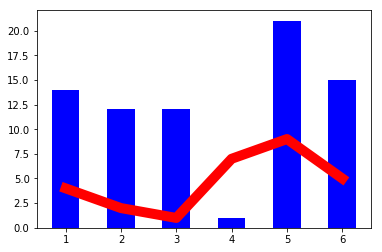

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3,4,5,6])
y = np.array([4,2,1,7,9,5])

plt.plot(x,y,'r',lw=10)    # 绘制折线图
# 参数1：x轴
# 参数2：y轴
# 参数3：折线颜色
# 参数4：线宽，可不填


a = np.array([1,2,3,4,5,6])
b = np.array([14,12,12,1,21,15])
plt.bar(a,b,0.5,alpha=1,color="b")
# 参数1 
# 参数2
# 参数3：柱状宽度，按比例分配。若为1，则为直方图
# 参数4：透明度
# 参数5：颜色
plt.show()


# 案例：神经网络逼近股票收盘均价

- 自定义三层神经网络：输入层A -> 隐藏层B -> 输出层C

- A为天数（15 x 1），C为每天的预测收盘价（15 x 1）

- 传输两次：
    - A -> B: 
        - 自定义：w1的维度(1 x 10)，b1的维度(1 x 10)
        - A * w1 + b1 = B
    - B -> C:         
        - 自定义：w2的维度(10 x 15)，b2的维度(15 x 1)
        - B * w2 + b2 = C
        
- 终止训练：
    1. for循环结束，程序终止
    2. loss达到一定的控制范围内，程序终止

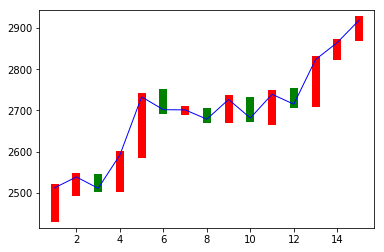

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# part1：显示每日k线图(柱状图)
date = np.linspace(1,15,15)    # 15天
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])

plt.figure()  # 绘图

for i in range(15):
    dateOne = np.zeros([2])    # 第一个日期储存当天开盘价，第二个日期储存当天收盘价
    dateOne[0] = date[i]
    dateOne[1] = date[i]
    priceOne = np.zeros([2])   # 第一个为开盘价，第二个为收盘价
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i] > beginPrice[i]:    # 盈利, 显示红色
        plt.plot(dateOne,priceOne,'r',lw=8)
    else:    # 亏损，显示绿色
        plt.plot(dateOne,priceOne,'g',lw=8)

# plt.show()    # 横坐标：天数，纵坐标：板块的点数

# part2：显示每日预测收盘价的折线图
# 日期和价格的归一化
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])

for i in range(15):
    # 需要补上下标，0表示第1列
    dateNormal[i,0] = i/14.0    # 最大天数不超过14天
    priceNormal[i,0] = endPrice[i]/3000.0    # 最大收盘价不超过3000

# 数据装载的方式
x = tf.placeholder(tf.float32, [None,1])    # 输入，15行1列
y = tf.placeholder(tf.float32, [None,1])

# A -> B，实现隐藏层
w1 = tf.Variable(tf.random_uniform([1,10],0,1))    # 自定义第一层的权重，维度1x10，取值[0,1]
b1 = tf.Variable(tf.zeros([1,10]))                 # 自定义第一层的偏置，维度1x10

wb1 = tf.matmul(x,w1) + b1    # 维度：(15x1) * (1x10) + (1x10) = (15x10)
layer1 = tf.nn.relu(wb1)      # 激活函数

# B -> C，实现输出层
w2 = tf.Variable(tf.random_uniform([10,1],0,1))    # 自定义第二层的权重，维度10x1，取值[0,1]
b2 = tf.Variable(tf.zeros([15,1]))                   # 自定义第二层的偏置，维度15x1

wb2 = tf.matmul(layer1, w2) + b2    # 维度：(15x10) * (10x1) + (15x1) = (15x1)
layer2 = tf.nn.relu(wb2)

# 均方误差，计算标准差
loss = tf.reduce_mean(tf.square(y - layer2))

# 使用梯度下降，减小误差loss。同时调整两个权重和偏置
# 每次调整的步长：每次下降0.1，目的是为了减小当前的loss：真实值与预测值之间的差值
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())    # 变量初始化
    
    for i in range(10000):
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})    # 训练完成后，得到w1,b1,w2,b2
        
    # 绘制预测结果: 判断是否准确，即predict与priceNormal(y)比较
    predNormal = sess.run(layer2, feed_dict={x:dateNormal})    # 归一化的价格
    
    predict_price = np.zeros([15,1])
    # 还原15天的实际(去归一化)预测价格：
    for i in range(15):
        predict_price[i,0] = (predNormal*3000)[i,0] 
    plt.plot(date, predict_price,'b',lw=1)
    
# plt.show()